In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('cancer.csv')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280


In [7]:
feature = df.iloc[:, 1:7]
feature.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760
1,20.57,17.77,132.90,1326.0,0.08474,0.07864
2,19.69,21.25,130.00,1203.0,0.10960,0.15990
3,11.42,20.38,77.58,386.1,0.14250,0.28390
4,20.29,14.34,135.10,1297.0,0.10030,0.13280


In [5]:
label = df.iloc[:, 0]
label.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [9]:
# construct training and testing sets
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=42)

In [10]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [11]:
predicted_y = model.predict(x_test)
accuracy = accuracy_score(y_test, predicted_y)
accuracy

0.8859649122807017

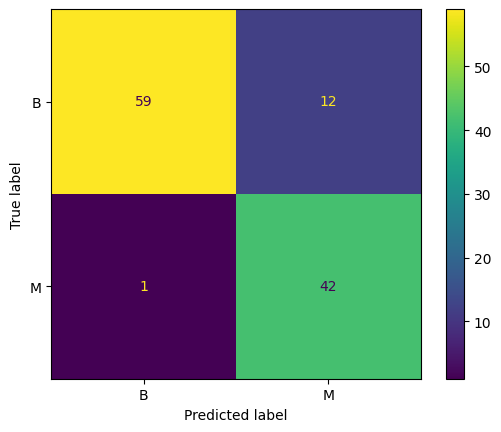

In [12]:
cm = confusion_matrix(y_test, predicted_y, labels=model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmd.plot()
plt.show()

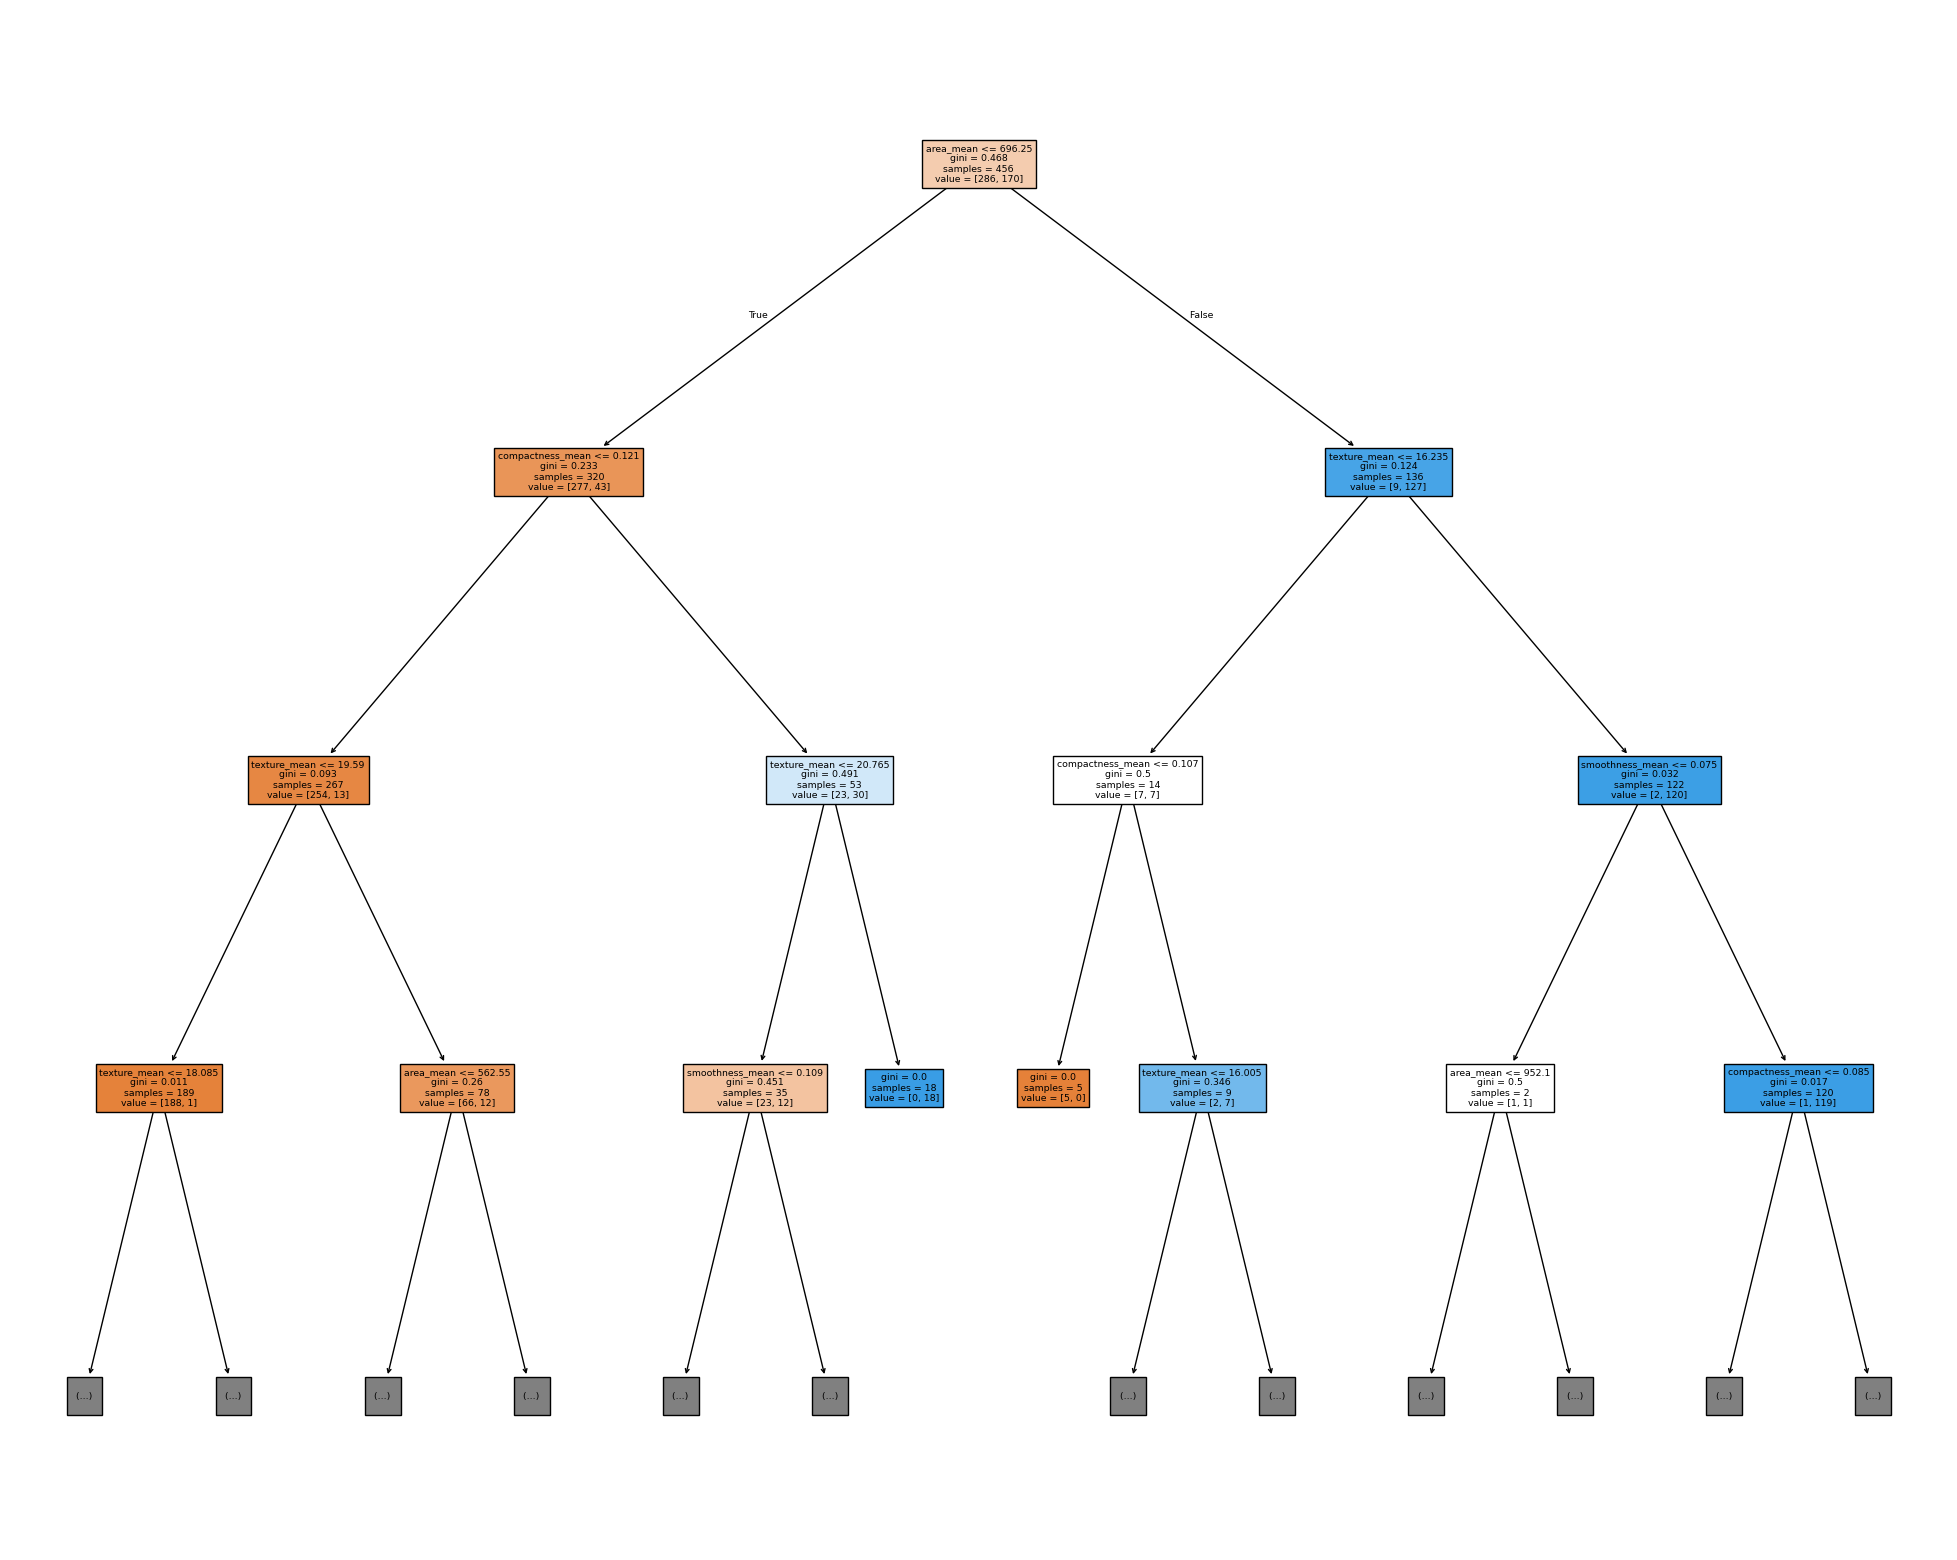

In [13]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model,
          feature_names = list(x_train),
          filled=True, max_depth=3)
plt.show()